# Classification des emails (SPAM et NOT SPAM)

## Mini Projet Application des algorithmes NLP

### Réaliser par le groupe :
#### Abdelouahab ELHADAF et Zakaria EDDAHIR
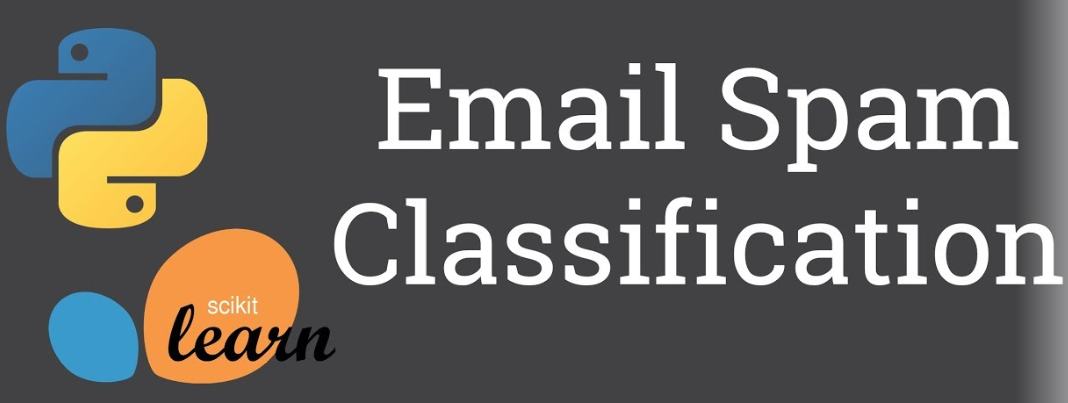

======================================================================================================================

In [ ]:
# Importation des bibliothèques requises
!pip install pandas
!pip install matplotlib
import re
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Importation de données: un fichier CSV comptant des exemples de mail spam et non spam pour l'entrainement de l'algorithme 
df = pd.read_csv("./spam_or_not_spam.csv")

df['label'] = df['label'].apply(lambda l: 'spam_l' if l == 1 else 'notspam_l')
df.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,notspam_l
1,martin a posted tassos papadopoulos the greek ...,notspam_l
2,man threatens explosion in moscow thursday aug...,notspam_l


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [4]:
# Supprimer les lignes vides
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB


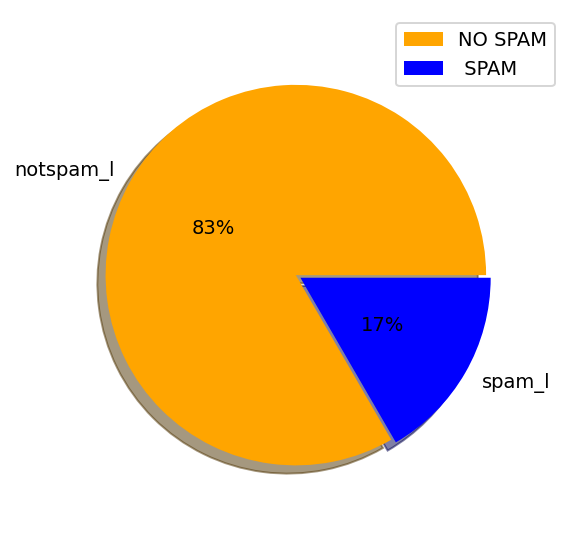

In [6]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["NO SPAM",' SPAM'])
plt.show()

In [7]:
# Déterminer le nombre de messages dans la variable
message_qty = len(df)
print(message_qty)

2999


### Data Cleaning

In [8]:
# Effacer les messages dans l'ensemble de données à partir d'espaces supplémentaires
def space_del(text):
    s = text.strip()
    s = " ".join([el for el in s.split(' ') if el.strip()])
    return s


df['email'] = df['email'].apply(space_del)

In [9]:
# affichage du nombre des messages "spam"
body_spam = df[df.label == 'spam_l']
body_spam = body_spam[0:500]
spam_qty = len(body_spam)
print(spam_qty)

499


In [10]:
# ... et les non spam
body_notspam = df[df.label == 'notspam_l']
body_notspam = body_notspam[0:2500]
notspam_qty = len(body_notspam)
print(notspam_qty)

2500


In [11]:
# Créer des dictionnaires vides pour stocker des mots spam et non spam
spam = {}
notspam = {}

In [12]:
def calculate_word_frequencies(body, label):

    text = body.lower()
    words = re.findall(r'\b[a-z]{4,15}\b', text) 
    
    if label == 'spam_l':# créer un dictionaire pour des mots "spam"      
        for word in words: 
            count = spam.get(word,0)
            spam[word] = count + 1

    else:
        for word in words: # créer un dictionaire pour des mots "non-spam" 
            count = notspam.get(word,0)
            notspam[word] = count + 1

 ### Entrainement de l'algorithme

In [13]:
def train():
   
    pA = round(spam_qty / message_qty, 2)
    pNotA = round(1 - pA, 2)
    
    for index_spam, row_spam in body_spam.iterrows():
        calculate_word_frequencies(
            row_spam['email'], row_spam['label']
        )
        
    for index_notspam, row_notspam in body_notspam.iterrows():
        calculate_word_frequencies(
            row_notspam['email'], row_notspam['label']
        )
    
    return pA, pNotA

In [14]:
# Créer des variables pour stocker les probabilités de se référer au non spam
pA = train()[0]
pNotA = train()[1]

In [15]:
print('pA:', pA, 'pNotA:', pNotA)

pA: 0.17 pNotA: 0.83


In [16]:
print('Spam words:', len(spam))
print('Non-Spam words:', len(notspam))

Spam words: 10135
Non-Spam words: 22844


In [17]:
# Implémenter la fonction de calcul de la probabilité de spam et de non-spam pour un mot
def calculate_P_Bi(word):
    try:
        P_Bi_A = spam[word]/sum(spam.values())
    except KeyError:
        P_Bi_A = 1
    
    try:
        P_Bi_notA = notspam[word]/sum(notspam.values())
    except KeyError:
        P_Bi_notA = 1
    
    return P_Bi_A, P_Bi_notA

In [18]:
# Vérifiez les probabilités d'être du spam et non du spam d'un mot aléatoire
word_test="gift"
print('SPAM :', (calculate_P_Bi(word_test)[0]) ) 
print('Not SPAM :', calculate_P_Bi(word_test)[1])

SPAM : 8.96637608966376e-05
Not SPAM : 2.4795821904009176e-05


### Implémentation  d'une fonction qui calculera la probabilité des spam et  non-spam pour le texte 
##### Pour implémenter la fonction, on va utiliser la formule de l'algorithme naive de Baiyes et la fonction calculate_P_Bi()

In [19]:
def classify(email):
   
    text = email.lower()
    words = re.findall(r'\b[a-z]{4,15}\b', text) 
    P_B_A = 1
    for word in words:
        P_B_A = P_B_A * (1 + calculate_P_Bi(word)[0])
    
    P_B_notA = 1
    for word in words:
        P_B_notA = P_B_notA * (1 + calculate_P_Bi(word)[1])
    
    if P_B_A * pA < P_B_notA * pNotA:

          return 'NOT A SPAM'
    else:
           return 'SPAM'

### Excecution du module sur des emails

In [20]:
# Letter of happiness :
email_1 = '''Hi, My name is Warren E. Buffett an American business magnate, 
investor and philanthropist. am the most successful investor in the world. 
I believe strongly in‘giving while living’ I had one idea that never changed in my mind? 
that you should use your wealth to help people and i have decided to give {$1,500,000.00} 
One Million Five Hundred Thousand United Dollars, to randomly selected individuals worldwide. 
On receipt of this email, you should count yourself as the lucky individual. 
Your email address was chosen online while searching at random. Kindly get back to me at 
your earliest convenience before i travel to japan for my treatment , so I know your email 
address is valid. Thank you for accepting our offer, we are indeed grateful You Can Google 
my name for more information: God bless you. Best Regard Mr.Warren E. Buffett Billionaire investor !'''

In [21]:
print('Ce mail peut être classer comme: ', classify(email_1))


Ce mail paut être classer comme:  SPAM


In [22]:
# Request feedback:
email_2 = '''Hi guys I want to build a website like REDACTED and I wanted to get your 
perspective of whether that site is good from the users' perspective before I go 
ahead and build something similar. I think that the design of the site is very 
modern and nice but I am not sure how people would react to a similar site? I look 
forward to your feedback. Many thanks!'''

In [23]:
print('Ce mail peut être classer comme: ', classify(email_2))

Ce mail paut être classer comme:  NOT A SPAM


In [24]:
# An invitation to interview :
email_3 = '''As a result of your application for the position of Data Engineer, 
I would like to invite you to attend an interview on May 30, at 9 a.m. at our 
office in Washington, DC. You will have an interview with the department manager, 
Moris Peterson. The interview will last about 45 minutes. If the date or time of 
the interview is inconvenient, please contact me by phone or email to arrange 
another appointment. We look forward to seeing you'''

In [25]:
print('Ce mail peut être classer comme: ', classify(email_3))

Ce mail paut être classer comme:  NOT A SPAM


In [26]:
# applying for the job as a Management Trainee 
email_4 = '''I am interested in applying for the job as a Management Trainee in your company. 
I have cleared my CS executive in June 2009 and appeared for CS Professional exam last group in June 2013 and Cost accountant inter and hereby Would like to start my training, 
This training Would provide me with the ideal opportunity to assist at your organization and to expand my skills .
My Resume, which is attached, provides information on my qualification and academic details.
As your company is registered for imparting training to us so please let me know , 
if I can provide you with any further information on my background and qualifications, 
'''




In [27]:
print('Ce mail peut être classer comme: ', classify(email_4))

Ce mail paut être classer comme:  NOT A SPAM


In [30]:

email_5 = ''' 

JUST MOVED HERE, WANNA HANG OUT?
MY PROFILE
VIDEOS
VIEW MY PROFILE
MY PHONE NUMBER
View
Image
Karsynpor6, 28F
Online Now
I'm Karsynpor6, I have not stayed here longer, since covid, I guess I have been locked in and we are not going out, but I just want to hang out with someone, maybe hook up and see where things go.

So are you wearing a mask when you go out? We should see if we are compatible, yea?'''

In [31]:
print('Ce mail peut être classer comme: ', classify(email_5))

Ce mail peut être classer comme:  SPAM
